In [2]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
import matplotlib
from tqdm import tqdm
from numba import prange,njit
import math
import os
import pickle
plt.style.use(hep.style.CMS)
%matplotlib inline

In [3]:
@njit
def dist_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaphi=abs(otherTsPhi[i] - refPhi)
        if deltaphi>math.pi: deltaphi=deltaphi-2*math.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + (deltaphi) ** 2) ** 0.5
        out.append(distance)
    return np.array(out)
@njit
def distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaPhi = otherTsPhi[i] - refPhi
        deltaPhi = (deltaPhi + np.pi) % (2 * np.pi) - np.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + deltaPhi ** 2) ** 0.5
        out.append(distance)
    return np.array(out)

@njit
def flatten_numba(a):
    return [x[0] if len(x) else 0 for x in a]



In [4]:
#filename='/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionPtError0PU/SinglePionTiming_1p9_100GeV/histo/histo_96692_0.root'
filename = "histo_200ev.root"
#path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/"
#files = os.listdir(path)[:10]
#print(files)
file = uproot.open(filename)

In [5]:
file.keys()

['ticlDumper;1',
 'ticlDumper/clusters;16',
 'ticlDumper/clusters;15',
 'ticlDumper/trackstersCLUE3DHigh;7',
 'ticlDumper/trackstersCLUE3DHigh;6',
 'ticlDumper/trackstersTiclCandidate;7',
 'ticlDumper/trackstersTiclCandidate;6',
 'ticlDumper/tracks;3',
 'ticlDumper/tracks;2',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/superclustering;1',
 'ticlDumper/associations;1',
 'ticlDumper/simTICLCandidate;1']

In [6]:
file["ticlDumper/simtrackstersSC"].keys()


['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [7]:
file["ticlDumper/simtrackstersCP"].keys()


['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [6]:
file["ticlDumper/tracks"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'track_id',
 'track_hgcal_x',
 'track_hgcal_y',
 'track_hgcal_xErr',
 'track_hgcal_yErr',
 'track_hgcal_xyCov',
 'track_hgcal_z',
 'track_hgcal_eta',
 'track_hgcal_phi',
 'track_hgcal_etaErr',
 'track_hgcal_phiErr',
 'track_hgcal_etaphiCov',
 'track_hgcal_pt',
 'track_pt',
 'track_missing_outer_hits',
 'track_missing_inner_hits',
 'track_quality',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_beta',
 'track_time_mtd',
 'track_time_mtd_err',
 'track_pos_mtd',
 'track_pos_mtd/track_pos_mtd.theVector.theX',
 'track_pos_mtd/track_pos_mtd.theVector.theY',
 'track_pos_mtd/track_pos_mtd.theVector.theZ',
 'track_nhits',
 'track_isMuon',
 'track_isTrackerMuon']

In [9]:
file["ticlDumper/trackstersTiclCandidate"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [10]:
file["ticlDumper/trackstersCLUE3DHigh"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [11]:
CUT=0.8

In [12]:
file=uproot.open(filename)

['.']


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_2253/1354521694.py:95: RuntimeWarning: invalid value encountered in double_scalars
  contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<distScan[k]) & (assocIdxs_sorted==i) ])/np.sum(tsEnergy_sorted[distance_sorted<distScan[k]])


2
2


  1%|          | 1/100 [00:02<04:50,  2.94s/it]

2
2


  2%|▏         | 2/100 [00:05<04:44,  2.90s/it]

2
2


  3%|▎         | 3/100 [00:08<04:43,  2.93s/it]

2
2


  4%|▍         | 4/100 [00:11<04:39,  2.91s/it]

2
2


  5%|▌         | 5/100 [00:14<04:34,  2.89s/it]

2
2


  6%|▌         | 6/100 [00:17<04:31,  2.89s/it]

2
2


  7%|▋         | 7/100 [00:20<04:28,  2.89s/it]

2
2


  8%|▊         | 8/100 [00:23<04:27,  2.90s/it]

65
65
36
36
74
74
2
2


 12%|█▏        | 12/100 [00:26<02:13,  1.52s/it]

23
23
21
21
2
2


 15%|█▌        | 15/100 [00:29<01:50,  1.30s/it]

2
2


 16%|█▌        | 16/100 [00:32<02:11,  1.56s/it]

58
58
2
2


 18%|█▊        | 18/100 [00:34<02:04,  1.52s/it]

27
27
34
34
2
2


 21%|██        | 21/100 [00:37<01:42,  1.29s/it]

2
2


 22%|██▏       | 22/100 [00:40<02:01,  1.55s/it]

2
2


 23%|██▎       | 23/100 [00:43<02:18,  1.80s/it]

18
18
33
33
2
2


 26%|██▌       | 26/100 [00:46<01:46,  1.44s/it]

2
2


 27%|██▋       | 27/100 [00:49<02:06,  1.73s/it]

72
72
2
2


 29%|██▉       | 29/100 [00:51<01:39,  1.39s/it]

2
2


 30%|███       | 30/100 [00:54<02:00,  1.72s/it]

2
2


 31%|███       | 31/100 [00:57<02:16,  1.99s/it]

19
19
2
2


 33%|███▎      | 33/100 [01:00<01:59,  1.79s/it]

2
2


 34%|███▍      | 34/100 [01:02<02:13,  2.02s/it]

84
84
2
2


 36%|███▌      | 36/100 [01:05<01:55,  1.80s/it]

2
2


 37%|███▋      | 37/100 [01:08<02:09,  2.05s/it]

2
2


 38%|███▊      | 38/100 [01:11<02:19,  2.25s/it]

2
2


 39%|███▉      | 39/100 [01:14<02:27,  2.42s/it]

10
10
2
2


 41%|████      | 41/100 [01:17<01:59,  2.03s/it]

2
2


 42%|████▏     | 42/100 [01:20<02:09,  2.23s/it]

2
2


 43%|████▎     | 43/100 [01:23<02:17,  2.40s/it]

2
2


 44%|████▍     | 44/100 [01:26<02:22,  2.55s/it]

2
2


 45%|████▌     | 45/100 [01:29<02:25,  2.65s/it]

26
26
39
39
2
2


 48%|████▊     | 48/100 [01:32<01:32,  1.77s/it]

2
2


 49%|████▉     | 49/100 [01:35<01:42,  2.01s/it]

8
8
29
29
2
2


 52%|█████▏    | 52/100 [01:38<01:13,  1.54s/it]

2
2


 53%|█████▎    | 53/100 [01:41<01:24,  1.81s/it]

7
7
65
65
2
2


 56%|█████▌    | 56/100 [01:44<01:03,  1.44s/it]

36
36
12
12
31
31
2
2


 60%|██████    | 60/100 [01:47<00:44,  1.11s/it]

2
2


 61%|██████    | 61/100 [01:50<00:53,  1.36s/it]

18
18
2
2


 63%|██████▎   | 63/100 [01:52<00:51,  1.39s/it]

2
2


 64%|██████▍   | 64/100 [01:55<00:58,  1.63s/it]

2
2


 65%|██████▌   | 65/100 [01:58<01:05,  1.88s/it]

2
2


 66%|██████▌   | 66/100 [02:01<01:11,  2.10s/it]

38
38
2
2


 68%|██████▊   | 68/100 [02:04<00:59,  1.85s/it]

2
2


 69%|██████▉   | 69/100 [02:07<01:04,  2.08s/it]

2
2


 70%|███████   | 70/100 [02:08<00:58,  1.94s/it]

2
2


 71%|███████   | 71/100 [02:11<01:03,  2.18s/it]

25
25
2
2


 73%|███████▎  | 73/100 [02:14<00:50,  1.88s/it]

2
2


 74%|███████▍  | 74/100 [02:17<00:55,  2.12s/it]

35
35
26
26
25
25
31
31
11
11
2
2


 80%|████████  | 80/100 [02:20<00:20,  1.04s/it]

2
2


 81%|████████  | 81/100 [02:23<00:24,  1.29s/it]

72
72
2
2


 83%|████████▎ | 83/100 [02:26<00:22,  1.34s/it]

37
37
2
2


 85%|████████▌ | 85/100 [02:29<00:20,  1.38s/it]

2
2


 86%|████████▌ | 86/100 [02:32<00:22,  1.63s/it]

2
2


 87%|████████▋ | 87/100 [02:35<00:24,  1.88s/it]

103
103
2
2


 89%|████████▉ | 89/100 [02:38<00:19,  1.73s/it]

98
98
2
2


 91%|█████████ | 91/100 [02:41<00:14,  1.65s/it]

2
2


 92%|█████████▏| 92/100 [02:43<00:15,  1.89s/it]

2
2


 93%|█████████▎| 93/100 [02:46<00:14,  2.12s/it]

2
2


 94%|█████████▍| 94/100 [02:49<00:13,  2.30s/it]

3
3
2
2


 96%|█████████▌| 96/100 [02:52<00:07,  1.95s/it]

123
123
2
2


 98%|█████████▊| 98/100 [02:55<00:03,  1.77s/it]

2
2


 99%|█████████▉| 99/100 [02:58<00:02,  2.01s/it]

2
2


100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


0.006012024048096192


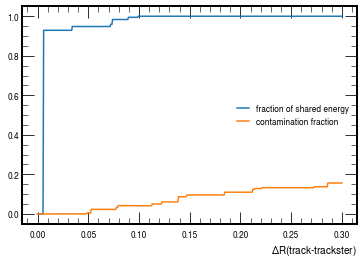

In [17]:
#ON ALL EVENTS


dict_info={"R" : [],
           "eta_trk" : [],
           "phi_trk" : [],
           "pt_trk" : [],
           "deltaR_trk" : [],
           "etaErr" : [],
           "phiErr" : [],
           "etaphiCov" : [],
           "contamination" : [],
           "simEnergy" : []
          }

folders_1p9 = ["SinglePionTimingPU_1p9_100GeV", "SinglePionTimingPU_1p9_10GeV",
     "SinglePionTimingPU_1p9_15GeV", "SinglePionTimingPU_1p9_2GeV",
     "SinglePionTimingPU_1p9_30GeV", "SinglePionTimingPU_1p9_4GeV",
     "SinglePionTimingPU_1p9_50GeV", "SinglePionTimingPU_1p9_6GeV",
     "SinglePionTimingPU_1p9_8GeV"]
folders_2p2 = ["SinglePionTimingPU_2p2_100GeV", "SinglePionTimingPU_2p2_10GeV",
     "SinglePionTimingPU_2p2_15GeV", "SinglePionTimingPU_2p2_2GeV",
     "SinglePionTimingPU_2p2_30GeV", "SinglePionTimingPU_2p2_4GeV",
     "SinglePionTimingPU_2p2_50GeV", "SinglePionTimingPU_2p2_6GeV",
     "SinglePionTimingPU_2p2_8GeV"]
folderlist=["."]
print(folderlist)
files=["histo.root"]
for folder in folderlist:
    #path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/"+folder+"/histo/"
    #files = os.listdir(path)[:10]
    
    for f in files: 
        file=uproot.open(filename)
        try: #avoids some .root files with no information contained in them
            alltracksters = file['ticlDumper/trackstersCLUE3DHigh']
        except: 
            continue
        allsimtrackstersCP = file['ticlDumper/simtrackstersCP']
        allsimtrackstersSC = file['ticlDumper/simtrackstersSC']
        alltracks = file["ticlDumper/tracks"]
        allassociations = file['ticlDumper/associations']
        tsCP=allsimtrackstersCP.arrays(["trackIdx","regressed_energy"])
        tsSC=allsimtrackstersSC.arrays(["trackIdx","regressed_energy"])
        tracksters = alltracksters.arrays(["barycenter_phi","barycenter_eta","raw_energy"])
        associations = allassociations.arrays(['tsCLUE3D_recoToSim_CP_sharedE',"tsCLUE3D_recoToSim_CP"])
        trks=alltracks.arrays(["track_hgcal_eta","track_hgcal_phi","track_pt","track_id", 'track_hgcal_etaErr','track_hgcal_phiErr','track_hgcal_etaphiCov'])
        
        for ev in tqdm(range(100)):
            assEv=associations[ev]
            for i in range(len(tsCP[ev]["trackIdx"])):
                print(len(tsSC[ev]["trackIdx"]))
                if len(tsSC[ev]["trackIdx"])!=2: continue
                if tsCP[ev]["trackIdx"][i]==-1: continue
                try:
                    trackIdx=np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]
                except ValueError:
                    continue
                simEnergy=tsCP[ev]["regressed_energy"][i]
                refEta=trks[ev]["track_hgcal_eta"][trackIdx]
                refPhi=trks[ev]["track_hgcal_phi"][trackIdx]
                #print(len(tracksters))
                tsEv = tracksters[ev]
                otherTsEta = tsEv["barycenter_eta"]
                otherTsPhi = tsEv["barycenter_phi"]
                #distance = ((otherTsEta-refEta)**2 + (otherTsPhi-refPhi)**2)**0.5
                #print(distance)
                distance = distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi)
                #print(distance)
                
                idx_sort = np.array(distance).argsort()
                distance_sorted = distance[idx_sort]
                tsEnergy_sorted = tsEv.raw_energy[idx_sort]
                sharedEnergy_sorted = assEv["tsCLUE3D_recoToSim_CP_sharedE"][idx_sort]
                assocIdxs_sorted = assEv["tsCLUE3D_recoToSim_CP"][idx_sort]
                correctTrackMask=(assocIdxs_sorted==i)
                totalSharedE=np.sum(sharedEnergy_sorted[correctTrackMask])
                distScan=np.linspace(0,0.7,100)
                listE=[]
                listContamination=[]
                radius=-1
                #print(sharedEnergy_sorted[(correctTrackMask)])
                frac= np.cumsum(flatten_numba(sharedEnergy_sorted[(correctTrackMask)]))/totalSharedE
                #contamination= 1.-np.cumsum(sharedEnergy_sorted[correctTrackMaskrackMask])
                firstAboveThrIdx = np.argmax(frac>CUT)
                radius=distance_sorted[firstAboveThrIdx]
                
                distScan=np.linspace(0,0.3,500)
                listE=[]
                listContamination=[]
                radius=-1
                for k in range(len(distScan)):
                    tempEn=np.sum(sharedEnergy_sorted[(distance_sorted<distScan[k]) & (assocIdxs_sorted==i) ])
                    frac=tempEn/totalSharedE
                    contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<distScan[k]) & (assocIdxs_sorted==i) ])/np.sum(tsEnergy_sorted[distance_sorted<distScan[k]])
                    if contamination != contamination : contamination=0
                    if (frac>0.8 and radius==-1):
                        radius=distScan[k]
                    listE.append(tempEn/totalSharedE)
                    listContamination.append(contamination)
                deltaR=math.sqrt((trks[ev]["track_hgcal_phiErr"][trackIdx]*1.5)**2+ (trks[ev]["track_hgcal_etaErr"][trackIdx]*1.5)**2) #+trks[ev]["track_hgcal_etaphiCov"][trackIdx]*1.5*1.5 )
                
                
                    
#print(listContamination)
plt.plot(distScan,listE,label="fraction of shared energy")
plt.plot(distScan,listContamination,label="contamination fraction")
plt.xlabel("$\Delta R$(track-trackster)")
plt.legend()
plt.savefig("example200PU.png")
print(radius)

#plt.plot(distScan,listE,label="fraction of shared energy")
#plt.plot(distScan,listContamination,label="contamination fraction")
#plt.xlabel("$\Delta R$(track-trackster)")
#plt.legend()
#print(radius)


0.006012024048096192


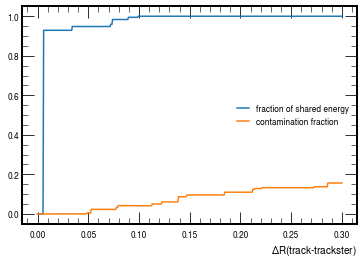

In [18]:
#print(listContamination)
plt.plot(distScan,listE,label="fraction of shared energy")
plt.plot(distScan,listContamination,label="contamination fraction")
plt.xlabel("$\Delta R$(track-trackster)")
plt.legend()
plt.savefig("example200PU.png")
print(radius)


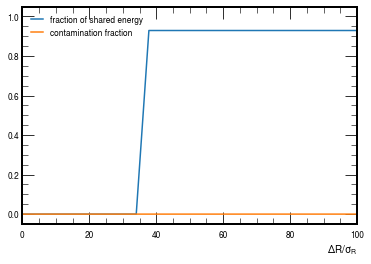

In [19]:
#print(listContamination)
plt.plot(np.array(distScan)/deltaR,listE,label="fraction of shared energy")
plt.plot(np.array(distScan)/deltaR,listContamination,label="contamination fraction")
plt.xlim(0,100)
plt.xlabel("$\Delta R$/$\sigma_R$")
plt.legend()
plt.savefig("example200PU.png")
#print(radius)

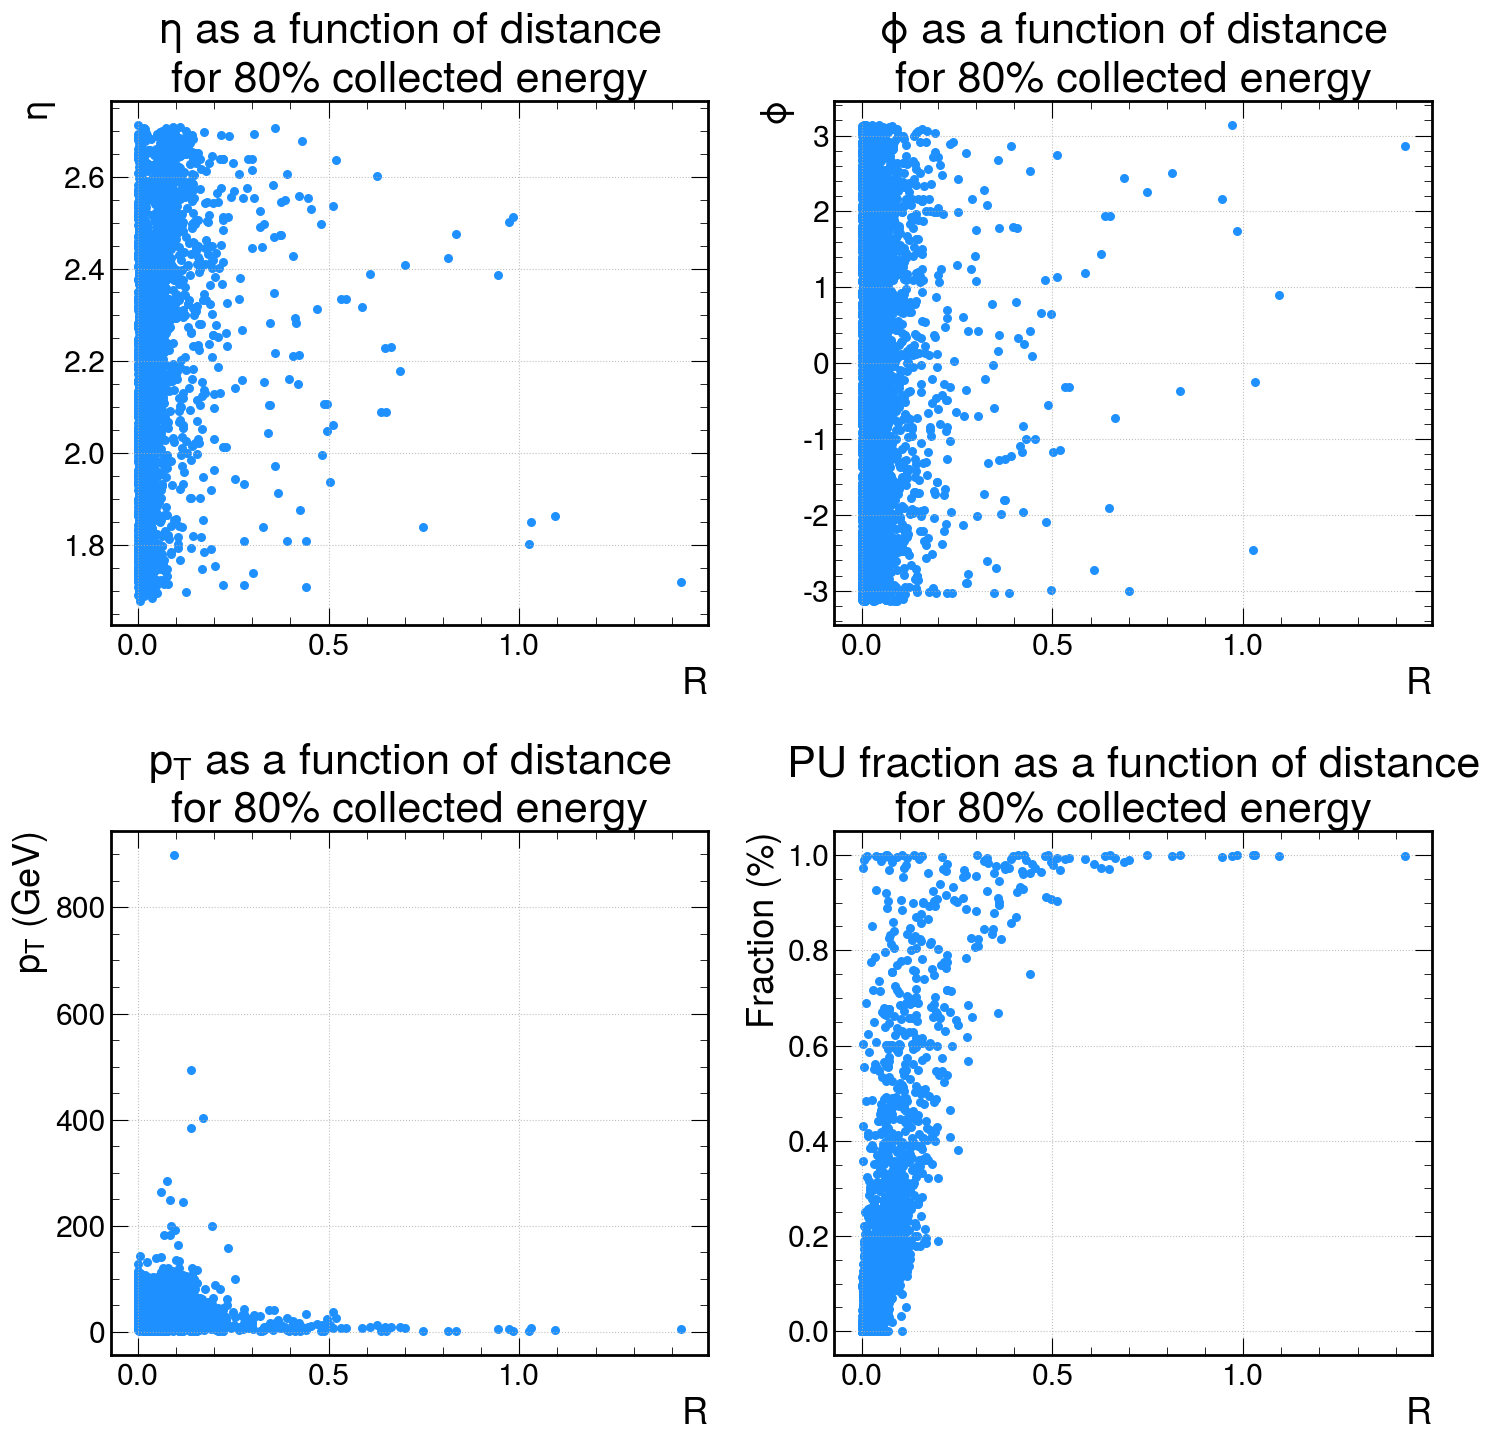

In [28]:

with open('results.pkl', 'rb') as file:
    dict_info=pickle.load(file)

#print(len(dict_info["R"]),len(dict_info["pt_trk"]),len(dict_info["phi_trk"]),len(dict_info["eta_trk"]),len(dict_info["contamination"]))

def scatterAx(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        plt.scatter(X, Y, s=s, color='dodgerblue')
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
scatterAx(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
scatterAx(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
scatterAx(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
scatterAx(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

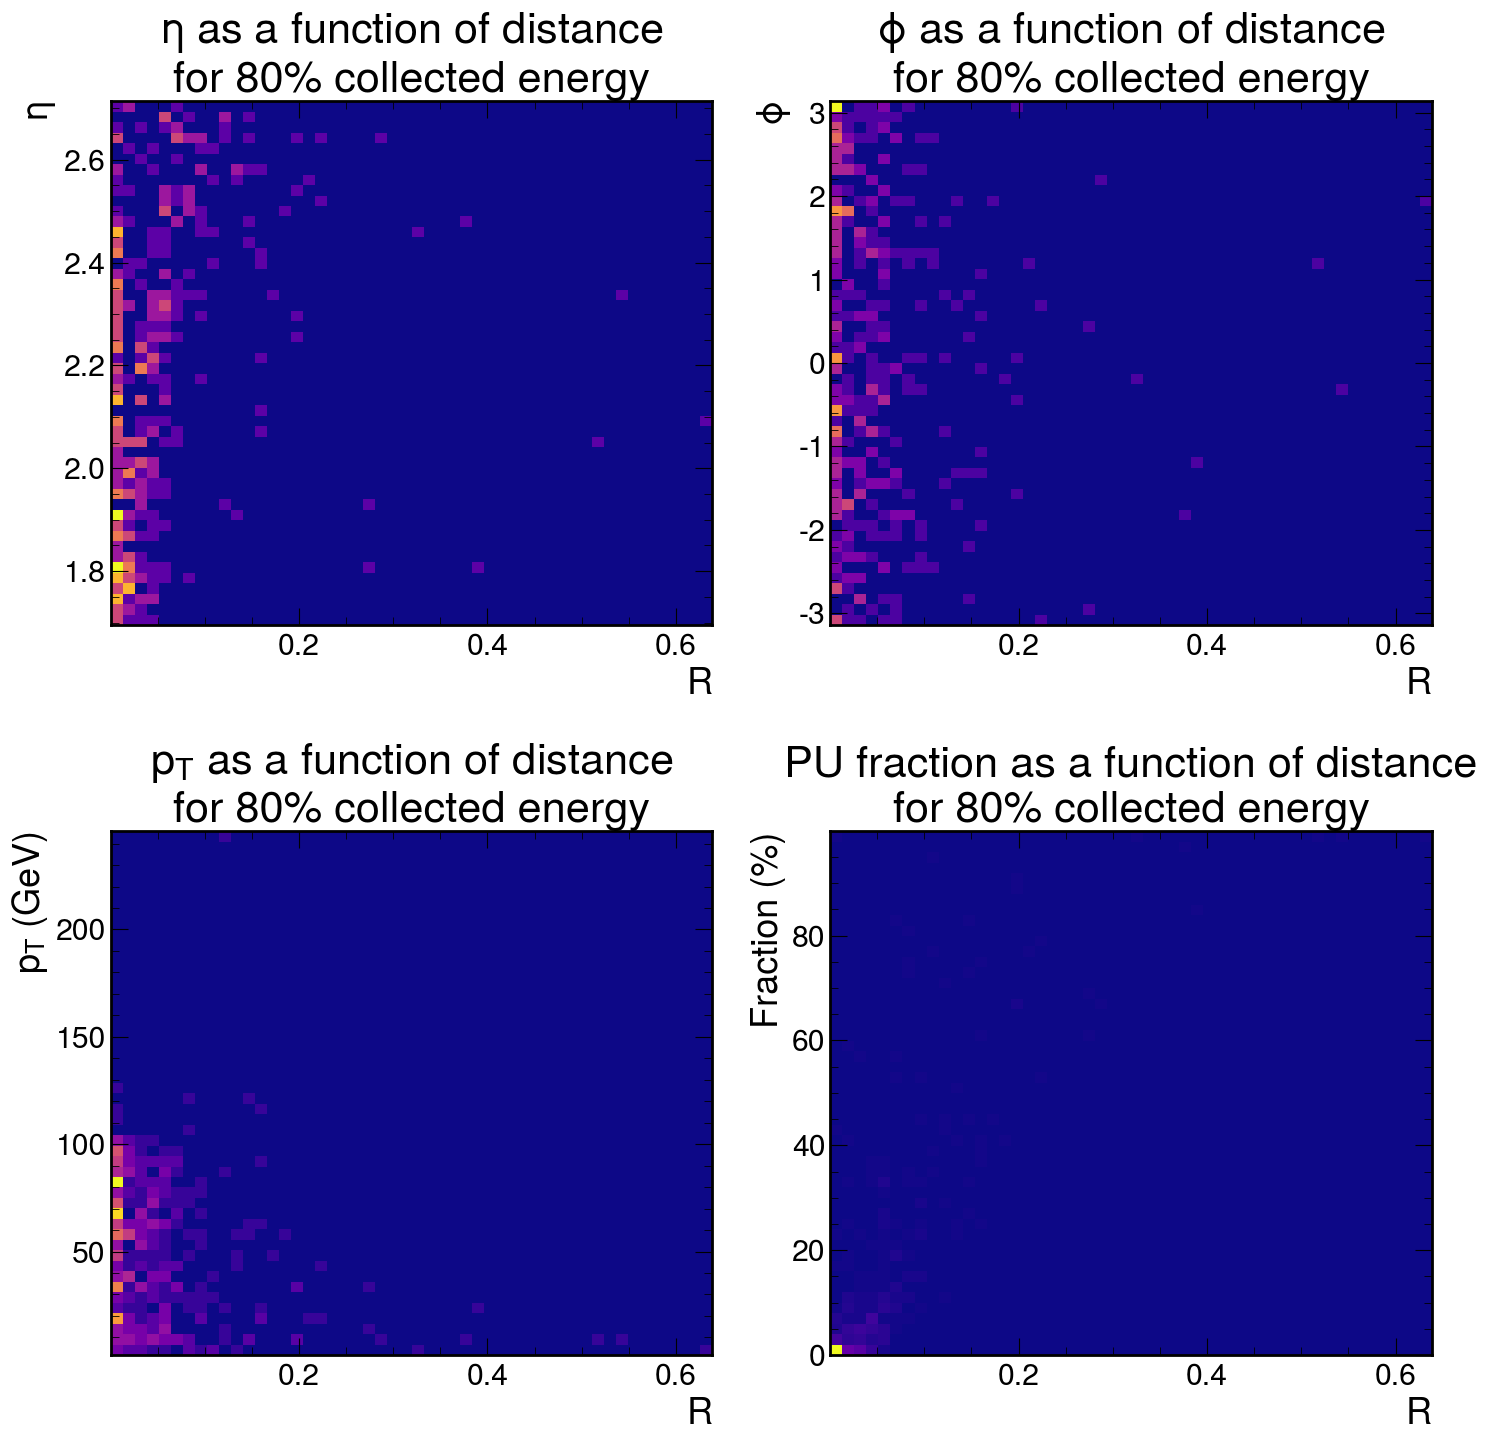

In [18]:
def hist2D_Ax(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.hist2d(ak.flatten(X), ak.flatten(Y),bins=10)#, s=ak.flatten(s), color='dodgerblue')
    except:
        plt.hist2d(X, Y,bins=50,cmap="plasma")#, s=s, color='dodgerblue')
    #plt.colorbar()
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    #plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
hist2D_Ax(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
hist2D_Ax(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
hist2D_Ax(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
hist2D_Ax(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

# BDT

In [19]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
#array_ts_info = np.array(ts_info).T

data_dict = dict_info
#print(data_dict)
df = pd.DataFrame(data_dict)
df_features = df[['eta_trk','phi_trk','pt_trk',"etaErr","phiErr", "etaphiCov", "deltaR_trk"]]
df_label = df[['R', 'contamination']]
df_weights=df[["simEnergy"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.1, random_state=42)

# Convert to DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100)

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 189.6314390161113


In [21]:
X_test, y_test

(      eta_trk   phi_trk      pt_trk    etaErr    phiErr     etaphiCov  \
 286  1.720633 -1.221300   16.500990  0.000390  0.000078  5.527895e-09   
 258  2.330042  1.549686    6.716900  0.000612  0.000164  2.159246e-08   
 262  2.279780  0.334087   64.145729  0.000113  0.000059 -3.919596e-10   
 145  2.397722  1.780814    6.345201  0.000594  0.000190 -2.903908e-08   
 55   1.803059 -1.160147   33.914864  0.000266  0.000056 -6.206903e-10   
 93   2.451403  1.782335   87.920654  0.000085  0.000076 -2.518438e-10   
 339  2.640597  0.700029   19.277262  0.000126  0.000122 -1.402548e-09   
 82   2.066351 -1.693923   34.294586  0.000204  0.000057 -2.075264e-10   
 364  2.385627 -0.431410   79.231834  0.000086  0.000078  3.930277e-10   
 148  2.713583  1.221859  109.378845  0.000135  0.000089 -1.226393e-09   
 291  2.242433 -0.619408   32.840675  0.000176  0.000073 -9.777155e-10   
 299  2.451894 -0.298744   74.862770  0.000208  0.000082  6.895518e-10   
 33   2.595758  2.374592   53.329735  

In [22]:
y_test, y_pred

(            R  contamination
 286  0.025923       3.930107
 258  0.039307      35.313864
 262  0.043439       6.158315
 145  0.019401      58.556328
 55   0.026011       4.181421
 93   0.003710       6.291511
 339  0.224358      79.048015
 82   0.001085       0.000000
 364  0.058080       4.452028
 148  0.001360       0.000000
 291  0.048915       4.107053
 299  0.001422       0.000000
 33   0.036477       2.962480
 90   0.017230      17.426811
 365  0.002810       0.000000
 371  0.043751       6.253207
 239  0.054599       9.409737
 113  0.196947      90.825824
 318  0.082647      34.903209
 108  0.054920       4.835264
 15   0.005360       0.000000
 141  0.077544      81.216070
 172  0.103041      77.792343
 0    0.051543      33.474212
 76   0.019063       4.253185
 355  0.040752      10.688924
 25   0.372202      97.768391
 360  0.004710       0.681762
 9    0.040531       6.065255
 116  0.003232       0.000000
 247  0.003275       0.000000
 140  0.007141       0.000000
 203  0.15

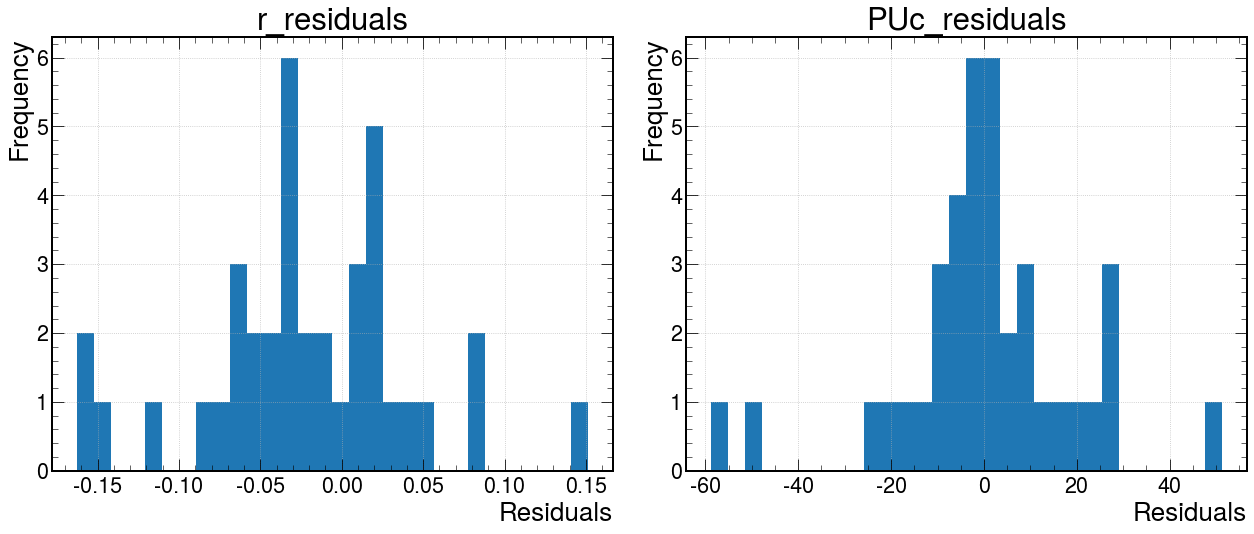

In [24]:
# Assuming y_test is a DataFrame or a numpy array with two columns (r and PUc)
# y_pred is the predicted output from the model

# Convert y_test to a numpy array (if it's a DataFrame)
y_test_array = np.array(y_test)

# Compute residuals
residuals = y_test_array - y_pred

# Convert residuals to a DataFrame for easy handling
residuals_df = pd.DataFrame(residuals, columns=['r_residuals', 'PUc_residuals'])

# Calculate mean and standard deviation for both r_residuals and PUc_residuals
r_mean = residuals_df['r_residuals'].mean()
r_std = residuals_df['r_residuals'].std()

PUc_mean = residuals_df['PUc_residuals'].mean()
PUc_std = residuals_df['PUc_residuals'].std()

# Plot the residuals
fig, axs = plt.subplots(1, 2, figsize=(18,8))
residuals_df['r_residuals'].hist(bins=30, ax=axs[0])
axs[0].set_title(f'r_residuals')
#axs[0].text(0.1, 100, f'Mean: {r_mean:.5f}\nStd: {r_std:.5f}')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

residuals_df['PUc_residuals'].hist(bins=30, ax=axs[1])
axs[1].set_title(f'PUc_residuals')
#axs[1].text(0.05, 100, f'Mean: {PUc_mean:.5f}\nStd: {PUc_std:.5f}')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

Number of trees in the model: 100


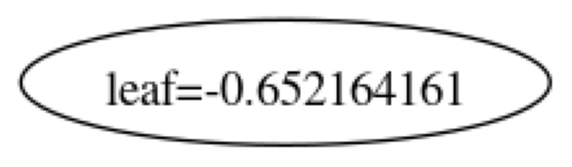

In [26]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

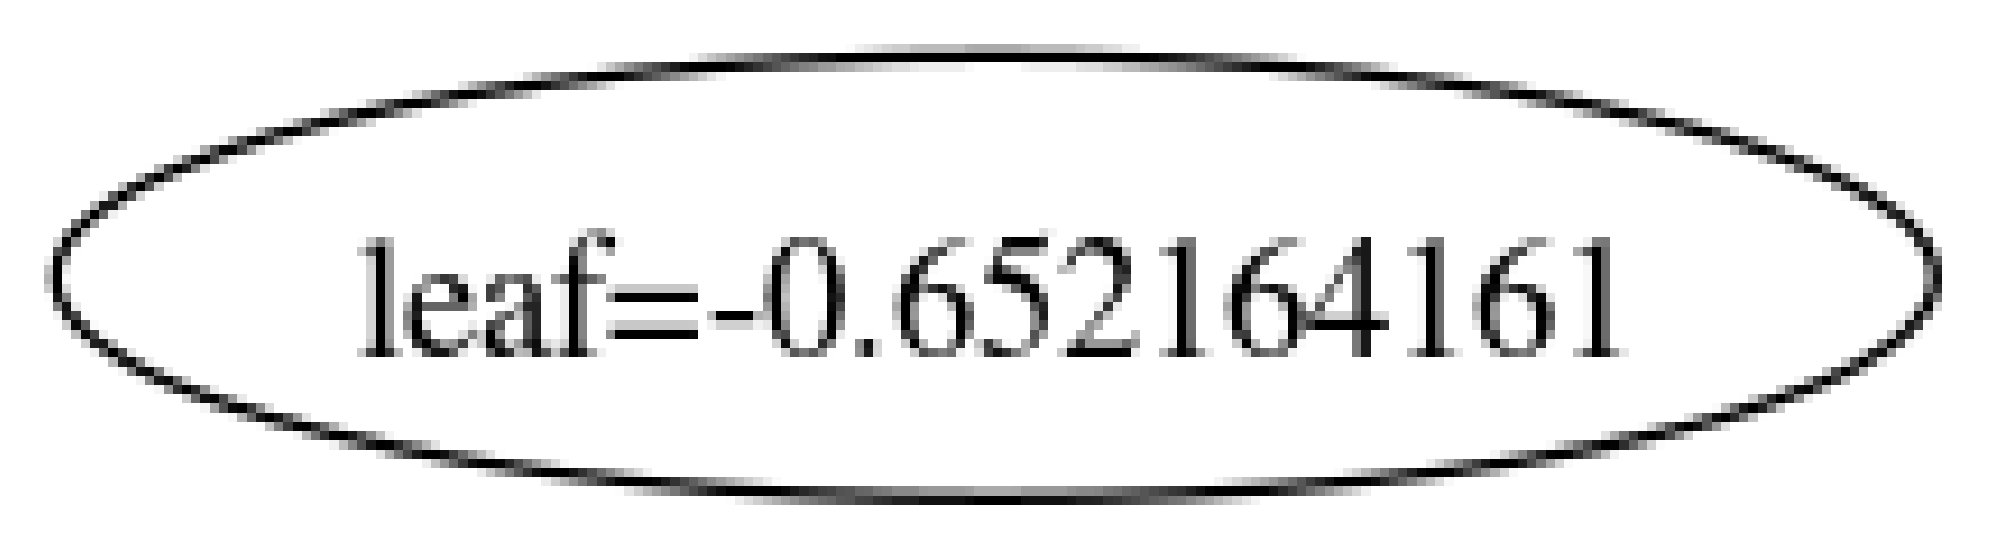

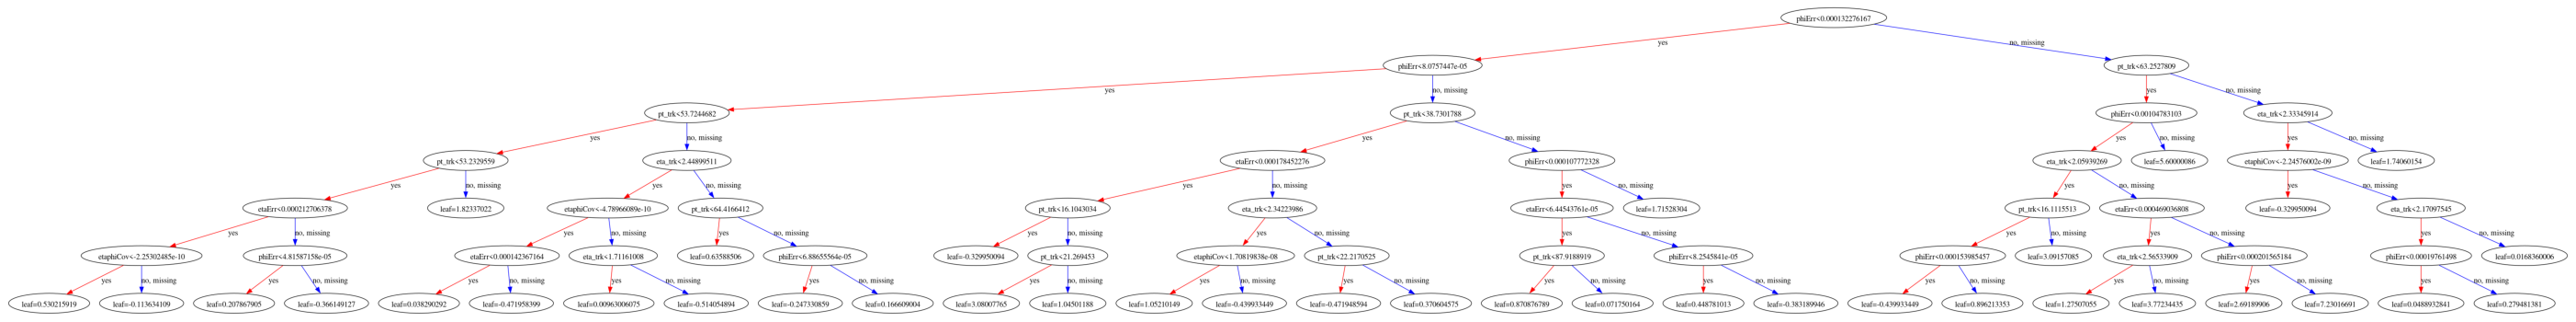

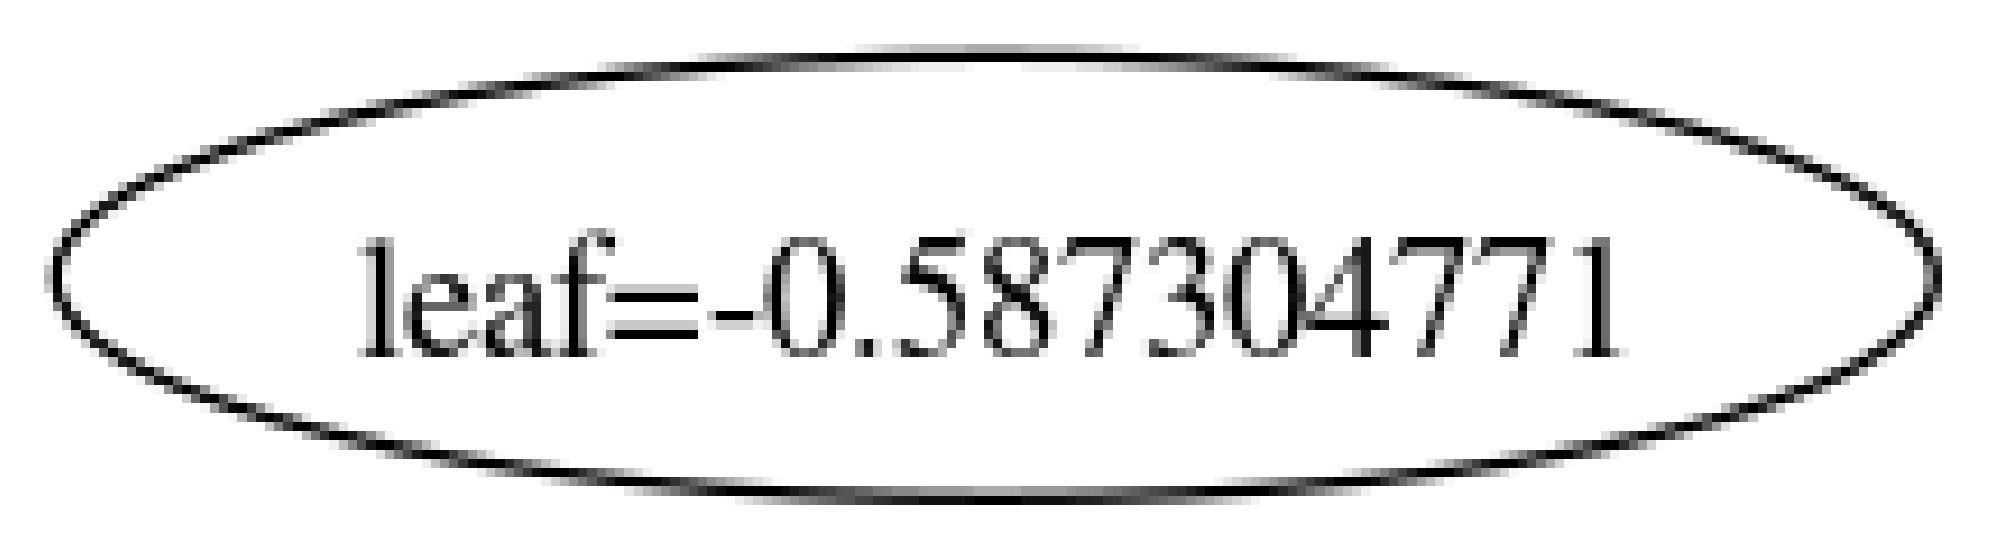

In [27]:
for i in range(3):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [28]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_reg = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    #'learning_rate': [0.01, 0.05, 0.1],
    'eta': [0.02, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE: {-grid_search.best_score_}")

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xgb.predict(X_test)

# Calculate MSE on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters found: {'alpha': 0, 'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.1, 'lambda': 1.5, 'max_depth': 9, 'subsample': 0.8}
Best cross-validated MSE: 96.58817570013532
Mean Squared Error on test data: 170.98544096644497


In [29]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
}

params.update(grid_search.best_params_)
print(params)

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100)

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
"""
# Assume you have a DataFrame called new_data with the same structure as your training data
new_data = pd.DataFrame({
    'z': [360,300],         # Example values for new data
    'eta': [1.7, 2.3],
    'phi': [0.3, 0.4],
    'energy': [150, 55]    # Example PU contamination values
})

# Convert to DMatrix format for XGBoost
new_dmatrix = xgb.DMatrix(new_data)

# Use the trained model to predict r values for new data
y_new_pred = xg_reg.predict(new_dmatrix)

# Display the predictions
print(f"Predicted r values for new data: {y_new_pred}")
"""
# Get the number of trees in the model
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

{'objective': 'reg:squarederror', 'alpha': 0, 'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.1, 'lambda': 1.5, 'max_depth': 9, 'subsample': 0.8}
Mean Squared Error: 170.98544096644497
Number of trees in the model: 100


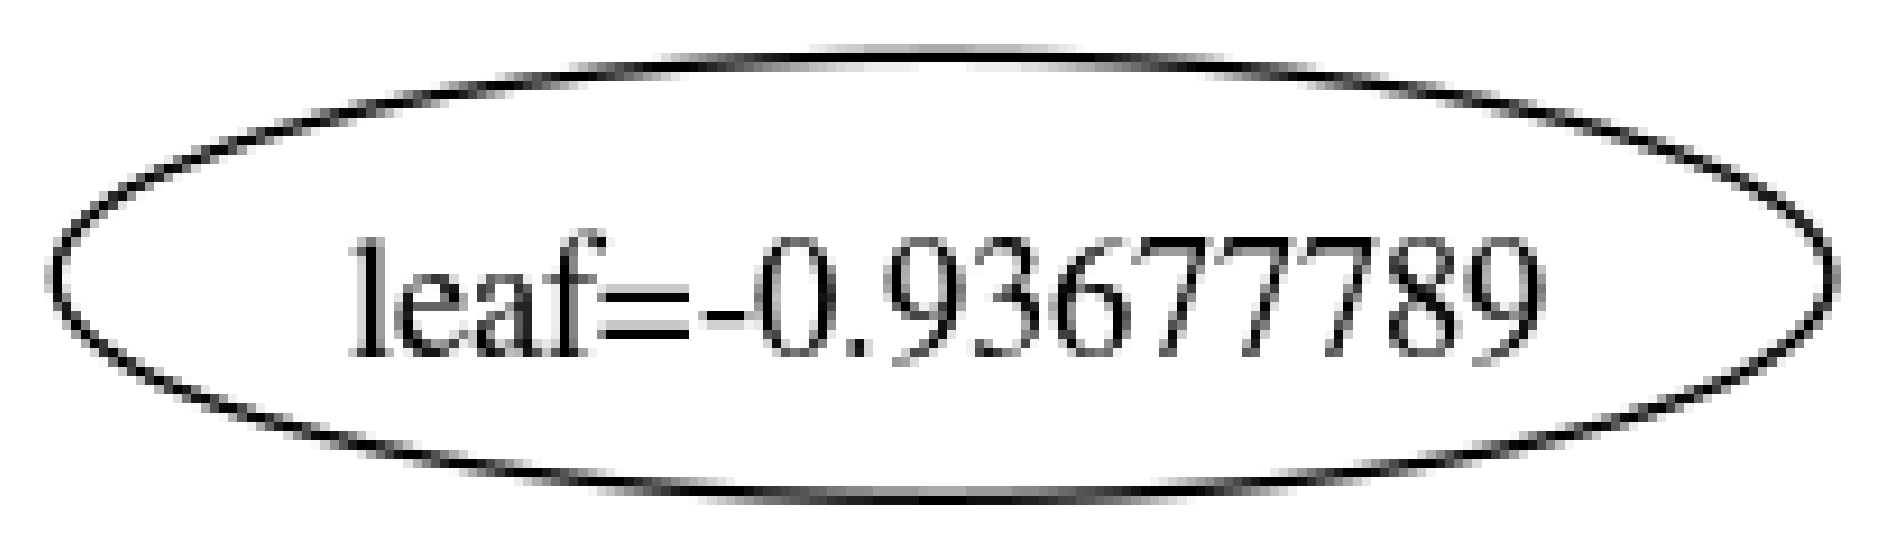

In [52]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

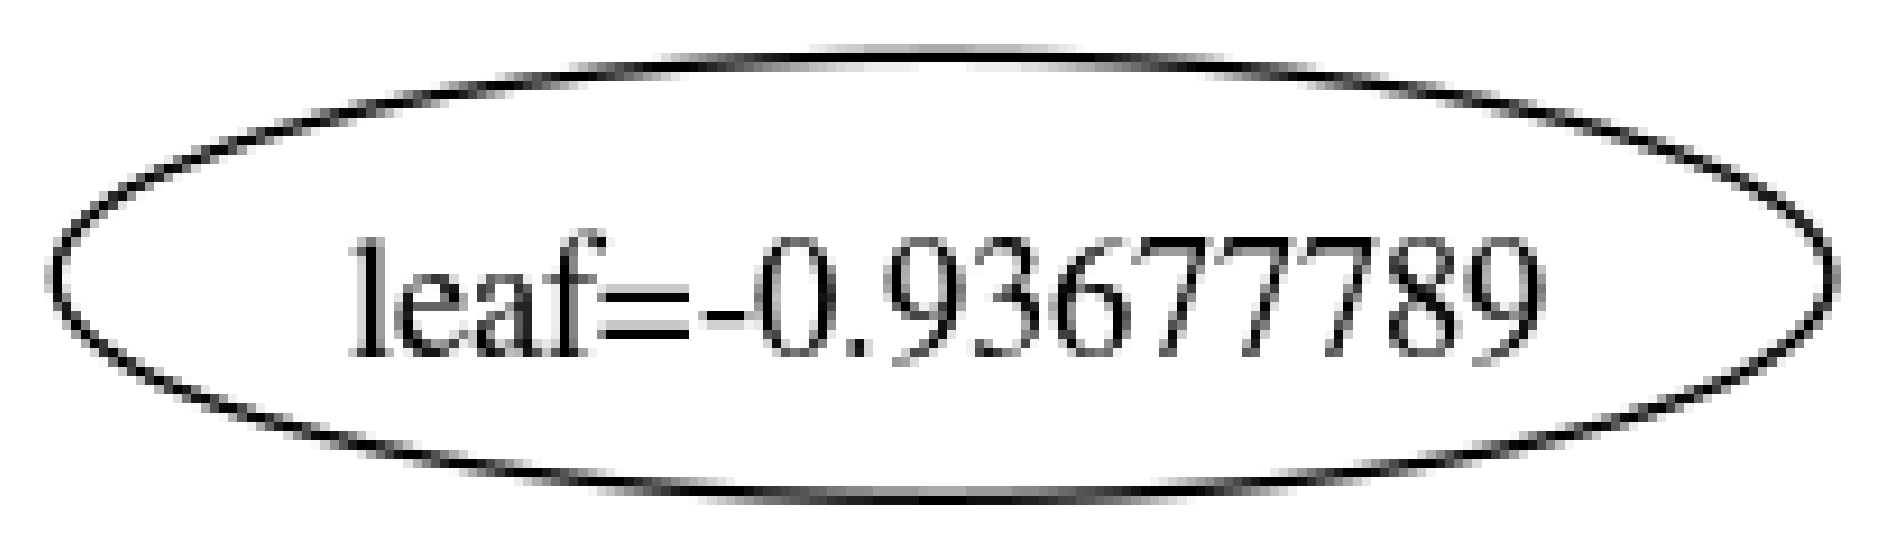

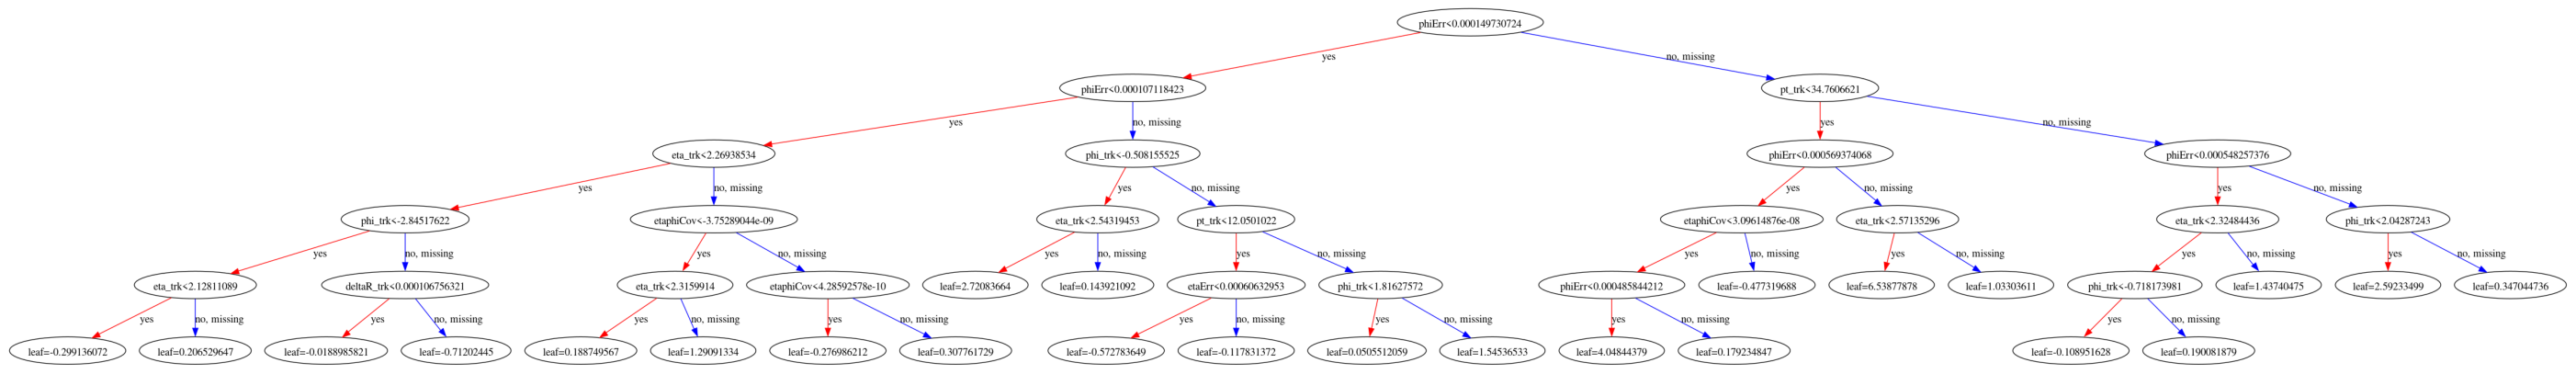

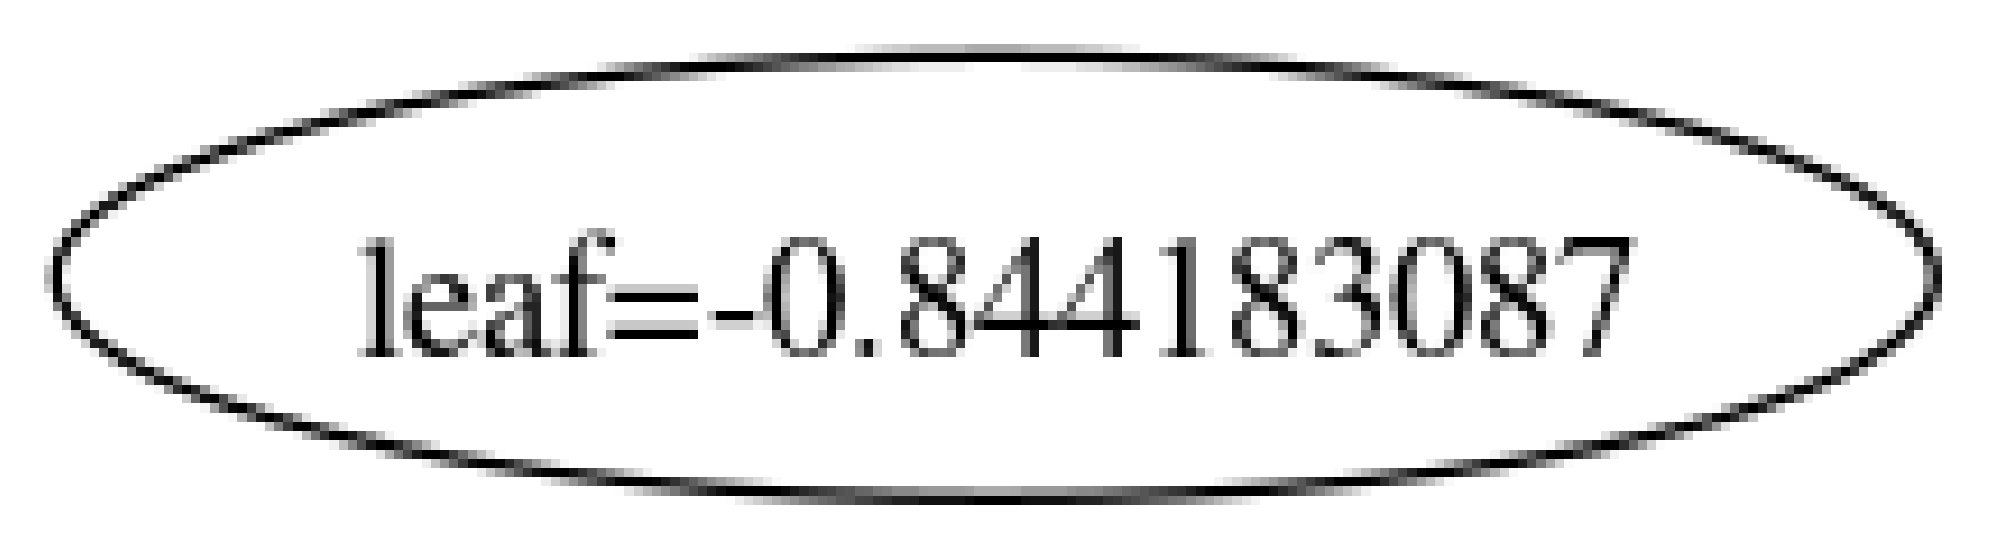

In [53]:
for i in range(3):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [30]:
# # save to JSON
xg_reg.save_model("model230files.json")

# model_xgb_2 = xgb.Booster()
# model_xgb_2.load_model("model.json")

Feature Importance (by frequency): {'eta_trk': 627.0, 'phi_trk': 383.0, 'pt_trk': 351.0, 'etaErr': 303.0, 'phiErr': 266.0, 'etaphiCov': 326.0, 'deltaR_trk': 131.0}


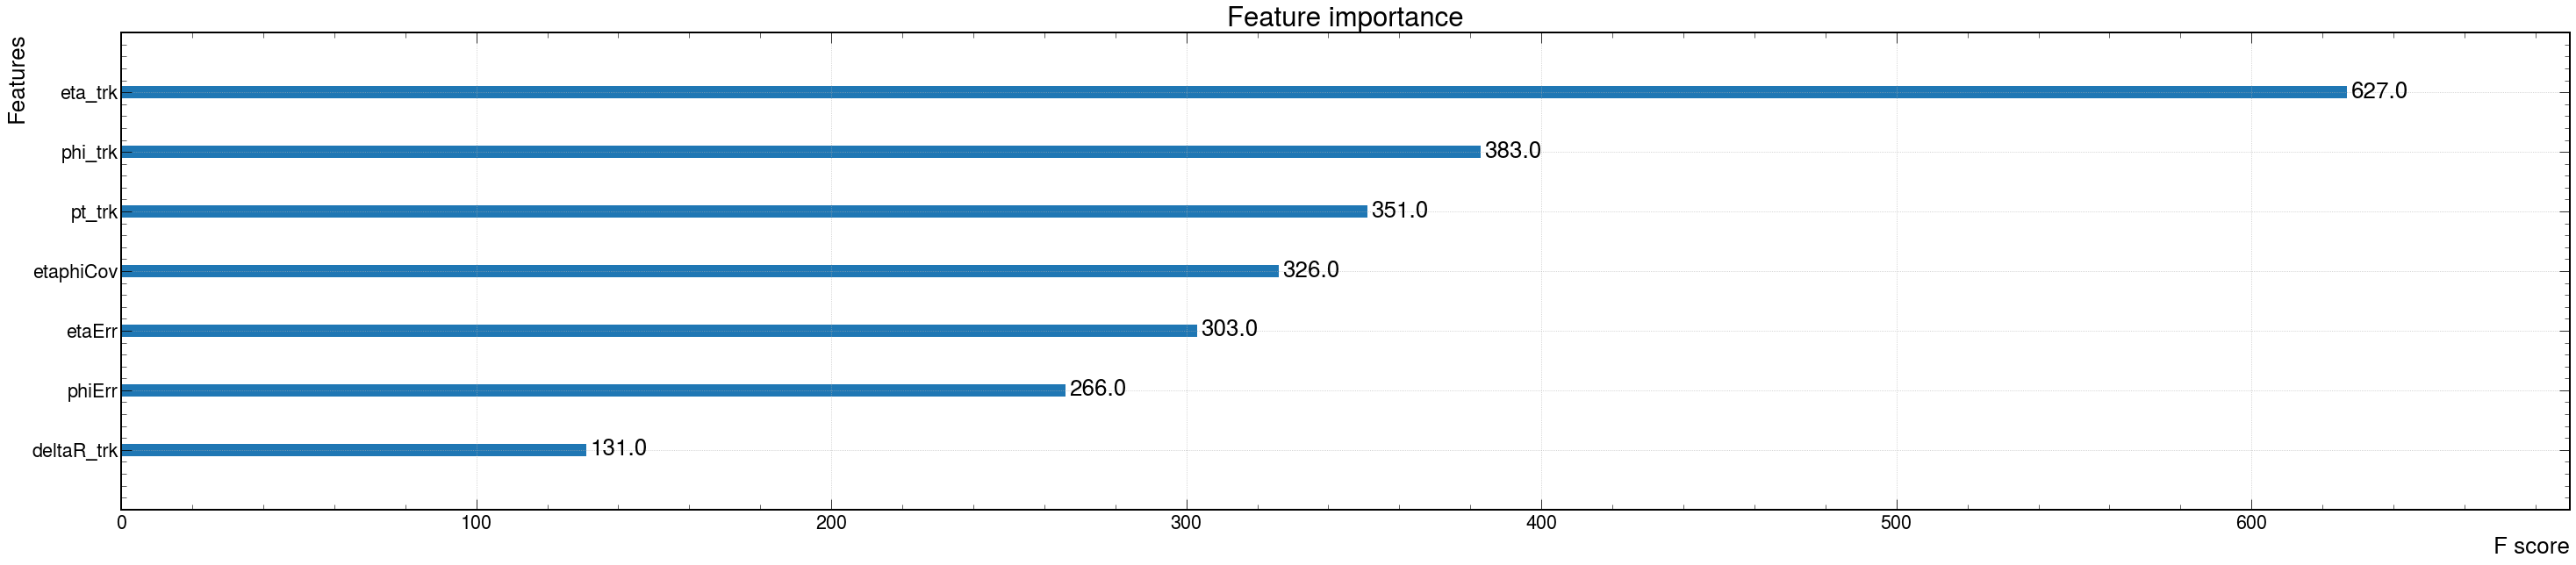

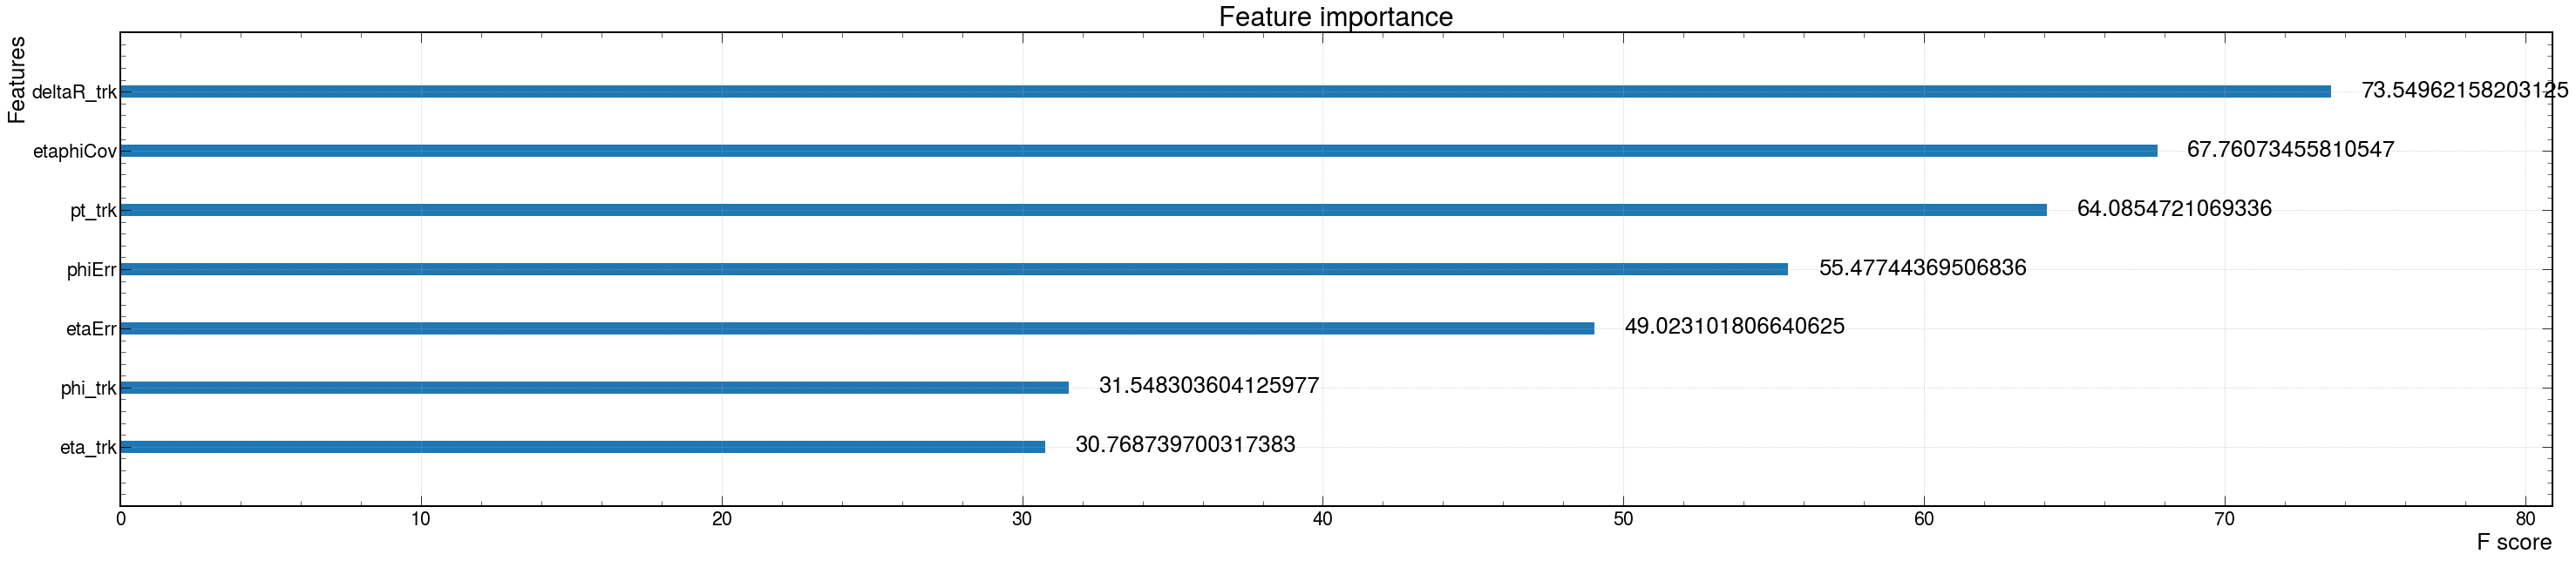

      Feature  Importance
4      phiErr  364.110718
6  deltaR_trk  254.598618
2      pt_trk  124.135246
3      etaErr   88.778770
0     eta_trk   52.295853
5   etaphiCov   38.904839
1     phi_trk   38.780823


In [31]:
# Get feature importance as a dictionary
feature_importance = xg_reg.get_score(importance_type='weight')
print("Feature Importance (by frequency):", feature_importance)


import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance (default: based on weight, i.e., frequency)
xgb.plot_importance(xg_reg, importance_type='weight')
plt.show()

# # You can also plot feature importance based on 'gain' or 'cover':
# # Gain: the improvement in accuracy brought by a feature to the branches it is on
# ax = xgb.plot_importance(xg_reg, importance_type='gain')
# plt.show()

# Cover: the relative number of observations affected by a feature
xgb.plot_importance(xg_reg, importance_type='cover')
plt.show()

import pandas as pd

# Get feature importance by gain
importance_dict = xg_reg.get_score(importance_type='gain')

# Convert to a pandas DataFrame for better visualization and analysis
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)


In [26]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.9/539.9 kB 14.8 MB/s eta 0:00:0000:01
DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: professor2 X.Y.Z has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of professor2 or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [32]:
import sys
sys.path.append('/eos/home-t/tipaulet/.local/lib/python3.9/site-packages')
import shap

print(X_test.corr())

             eta_trk   phi_trk    pt_trk    etaErr    phiErr  etaphiCov  \
eta_trk     1.000000  0.067584 -0.008321 -0.000930 -0.000977  -0.008569   
phi_trk     0.067584  1.000000  0.033384  0.110886  0.173521  -0.310540   
pt_trk     -0.008321  0.033384  1.000000 -0.716675 -0.225286   0.136630   
etaErr     -0.000930  0.110886 -0.716675  1.000000  0.327157  -0.316187   
phiErr     -0.000977  0.173521 -0.225286  0.327157  1.000000  -0.426867   
etaphiCov  -0.008569 -0.310540  0.136630 -0.316187 -0.426867   1.000000   
deltaR_trk -0.028888  0.187270 -0.367160  0.528470  0.973388  -0.436081   

            deltaR_trk  
eta_trk      -0.028888  
phi_trk       0.187270  
pt_trk       -0.367160  
etaErr        0.528470  
phiErr        0.973388  
etaphiCov    -0.436081  
deltaR_trk    1.000000  


In [33]:
# Create an explainer using your trained model
explainer = shap.TreeExplainer(xg_reg)

# Compute SHAP values for your test data
shap_values = explainer.shap_values(X_test)

In [34]:
# Assuming two outputs, you can extract SHAP values for each
shap_values_r = shap_values[:, :, 0]  # SHAP values for the first output 'r'
shap_values_puc = shap_values[:, :, 1]  # SHAP values for the second output 'PUc'

# Convert SHAP values for 'r' to a DataFrame
shap_values_r_df = pd.DataFrame(shap_values_r, columns=X_test.columns)
print(shap_values_r_df.describe())

# Convert SHAP values for 'PUc' to a DataFrame (optional, if you want to analyze PUc separately)
shap_values_puc_df = pd.DataFrame(shap_values_puc, columns=X_test.columns)
print(shap_values_puc_df.describe())

       eta_trk  phi_trk  pt_trk  etaErr     phiErr  etaphiCov  deltaR_trk
count     38.0     38.0    38.0    38.0  38.000000  38.000000   38.000000
mean       0.0      0.0     0.0     0.0   0.005497   0.007418    0.000610
std        0.0      0.0     0.0     0.0   0.027082   0.026572    0.008401
min        0.0      0.0     0.0     0.0  -0.011091  -0.002700   -0.000753
25%        0.0      0.0     0.0     0.0  -0.011091  -0.002700   -0.000753
50%        0.0      0.0     0.0     0.0  -0.011091  -0.002700   -0.000753
75%        0.0      0.0     0.0     0.0   0.021552  -0.002700   -0.000753
max        0.0      0.0     0.0     0.0   0.066243   0.093113    0.051037
         eta_trk    phi_trk     pt_trk     etaErr     phiErr  etaphiCov  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean    1.456573  -0.186963   0.647598   1.067504   2.733614   0.110064   
std     4.879788   1.473018   5.558143   3.006255   9.750477   1.923743   
min    -7.558353  -6.600847 -11.02

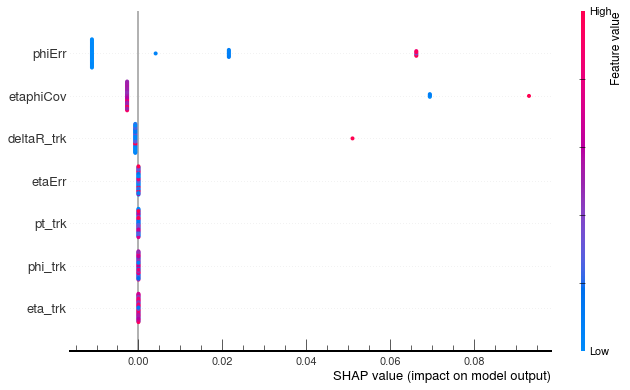

In [35]:
# Plot SHAP summary for 'r'
shap.summary_plot(shap_values_r, X_test, plot_size=(10,6)) # , max_display=X_test.shape[1] is for the max number of variables to be displayed (default is 20)

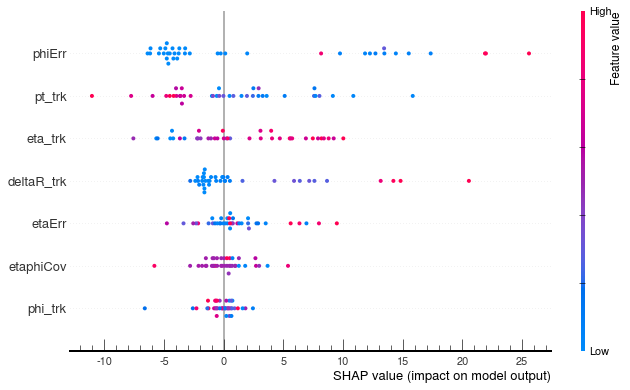

In [36]:
# Plot SHAP summary for 'PUc'
shap.summary_plot(shap_values_puc, X_test, plot_size=(10,6)) 